In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load train data
train_df = pd.read_csv(r"C:\Users\JINCY\Desktop\Study Material\DSA\DSA project\credit score classification\train.csv",low_memory=False)

In [3]:
# load test data
test_df = pd.read_csv(r"C:\Users\JINCY\Desktop\Study Material\DSA\DSA project\credit score classification\test.csv", low_memory=False)

In [4]:
train_df.head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231,Good


In [5]:
test_df.head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [6]:
train_df.shape

(100000, 28)

In [7]:
test_df.shape

(50000, 27)

In [8]:
# check for null values
train_df.isna().sum() 

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

There are null values in 
- Name 
- Monthly_Inhand_Salary 
- Type_of_Loan 
- Num_of_Delayed_Payment
- Num_Credit_Inquiries
- Credit_History_Age
- Amount_invested_monthly
- Monthly_Balance 

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [10]:
train_df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633330,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


Minimum values are negative in some columns.

#### 1 . Removing symbols/characters present in rows

In [11]:
# identify numerical columns with symbols present in rows
train_df.select_dtypes(include='object').columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Num_of_Loan', 'Type_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

Columns that should be of numeric datatype:
- Age
- Annual_Income
- Num_of_Loan
- Num_of_Delayed_Payment
- Changed_Credit_Limit
- Outstanding_Debt
- Amount_invested_monthly
- Monthly_Balance

In [12]:
# select those 8 columns
convert_cols = ['Age',
       'Annual_Income', 'Num_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Outstanding_Debt', 
       'Amount_invested_monthly','Monthly_Balance']

In [13]:
# check unique values in all columns
for col in train_df.columns:
    print(f"\n{col}\n",train_df[col].unique())


ID
 ['0x1602' '0x1603' '0x1604' ... '0x25feb' '0x25fec' '0x25fed']

Customer_ID
 ['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' ... 'CUS_0xaf61' 'CUS_0x8600'
 'CUS_0x942c']

Month
 ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']

Name
 ['Aaron Maashoh' nan 'Rick Rothackerj' ... 'Chris Wickhamm'
 'Sarah McBridec' 'Nicks']

Age
 ['23' '-500' '28_' ... '4808_' '2263' '1342']

SSN
 ['821-00-0265' '#F%$D@*&8' '004-07-5839' ... '133-16-7738' '031-35-0942'
 '078-73-5990']

Occupation
 ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']

Annual_Income
 ['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_']

Monthly_Inhand_Salary
 [1824.843333         nan 3037.986667 ... 3097.008333 1929.906667
 3359.415833]

Num_Bank_Accounts
 [   3    2    1    7    4    0    8    5    6    9   10 1414 1231   67
  572 1488   91  528 1647 1696 13


Credit_Score
 ['Good' 'Standard' 'Poor']


In [14]:
#remove unwanted characters from the selected columns using for loop
for col in convert_cols:  
    train_df[col] = train_df[col].str.strip('-_') #removes - and _ from beginning and end of values

In [15]:
for col in train_df.columns:
    print(f"\n{col}\n",train_df[col].unique())


ID
 ['0x1602' '0x1603' '0x1604' ... '0x25feb' '0x25fec' '0x25fed']

Customer_ID
 ['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' ... 'CUS_0xaf61' 'CUS_0x8600'
 'CUS_0x942c']

Month
 ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']

Name
 ['Aaron Maashoh' nan 'Rick Rothackerj' ... 'Chris Wickhamm'
 'Sarah McBridec' 'Nicks']

Age
 ['23' '500' '28' ... '4808' '2263' '1342']

SSN
 ['821-00-0265' '#F%$D@*&8' '004-07-5839' ... '133-16-7738' '031-35-0942'
 '078-73-5990']

Occupation
 ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']

Annual_Income
 ['19114.12' '34847.84' '143162.64' ... '37188.1' '20002.88' '39628.99']

Monthly_Inhand_Salary
 [1824.843333         nan 3037.986667 ... 3097.008333 1929.906667
 3359.415833]

Num_Bank_Accounts
 [   3    2    1    7    4    0    8    5    6    9   10 1414 1231   67
  572 1488   91  528 1647 1696 1338  6

In [16]:
# remove unwanted characters from rest of the columns
# replace empty row with nan
train_df['Changed_Credit_Limit'].str.strip().replace('', np.nan)

# to apply the changes to whole dataframe
train_df.replace('', np.NaN, inplace=True) #replaces blank rows
train_df.replace('_______', np.NaN, inplace=True)


#### 2. Convert the datatype to int/ float for above columns

In [17]:
train_df['Age']=train_df['Age'].astype(int)
train_df['Annual_Income']=train_df['Annual_Income'].astype(float)
train_df['Num_of_Loan']=train_df['Num_of_Loan'].astype(int)
train_df['Num_of_Delayed_Payment']=train_df['Num_of_Delayed_Payment'].astype(float)
train_df['Changed_Credit_Limit']=train_df['Changed_Credit_Limit'].astype(float)
train_df['Outstanding_Debt'] = train_df['Outstanding_Debt'].astype(float)
train_df['Amount_invested_monthly']=train_df['Amount_invested_monthly'].astype(float)
train_df['Monthly_Balance'] =train_df['Monthly_Balance'].astype(float)

#### 3. Study each column and plot

In [18]:
train_df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [19]:
train_df.nunique()

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10139
Age                           1728
SSN                          12501
Occupation                      15
Annual_Income                13613
Monthly_Inhand_Salary        13235
Num_Bank_Accounts              943
Num_Credit_Card               1179
Interest_Rate                 1750
Num_of_Loan                    413
Type_of_Loan                  6260
Delay_from_due_date             73
Num_of_Delayed_Payment         708
Changed_Credit_Limit          3103
Num_Credit_Inquiries          1223
Credit_Mix                       4
Outstanding_Debt             12203
Credit_Utilization_Ratio     99998
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          14950
Amount_invested_monthly      91049
Payment_Behaviour                7
Monthly_Balance              98790
Credit_Score                     3
dtype: int64

In [20]:
# can drop ID, Name and SSN as they are identifiers and not useful for visualization
train_df1 = train_df.drop(['ID', 'Name', 'SSN'], axis=1)

In [21]:
train_df1.columns

Index(['Customer_ID', 'Month', 'Age', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

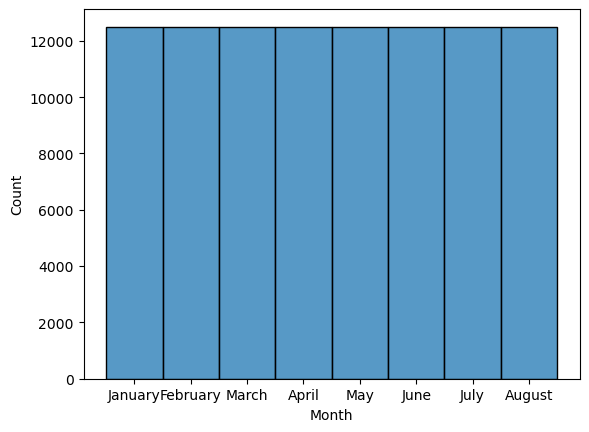

In [22]:
sns.histplot(train_df1['Month'])
plt.show()

Data is equally distributed from January to August.

In [23]:
train_df1['Age'].value_counts() # age showing very high values, needs to be replaced

38      2994
28      2968
31      2955
26      2945
32      2884
        ... 
1908       1
4583       1
7549       1
3119       1
1342       1
Name: Age, Length: 1728, dtype: int64

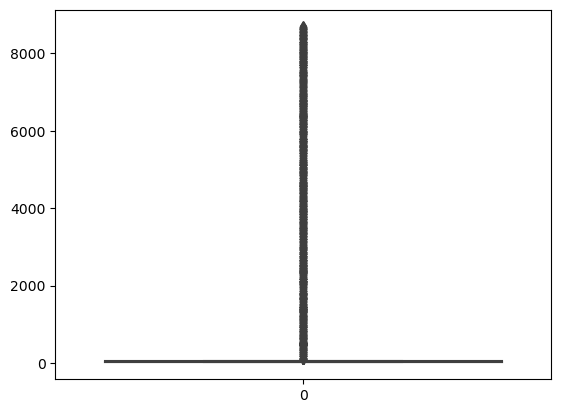

In [24]:
# plot using boxplot
sns.boxplot(train_df1['Age'])
plt.show()

In [25]:
# check Age values greater than 56
train_df1[train_df1['Age']>56].sort_values('Age')

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
38248,CUS_0x7e94,January,95,Engineer,46162.62,3548.885000,10,5,16,2,...,Bad,1788.63,35.386419,15 Years and 5 Months,Yes,65.956819,288.645844,Low_spent_Small_value_payments,290.285837,Standard
65420,CUS_0xdc8,May,95,NaN,28169.69,2171.474167,7,3,15,0,...,_,330.54,28.901025,29 Years and 1 Months,No,0.000000,146.166716,Low_spent_Large_value_payments,340.980700,Standard
78564,CUS_0x1dd3,May,95,Manager,68484.44,NaN,5,7,5,5,...,Standard,105.41,28.430067,12 Years and 5 Months,NM,225.535667,220.000806,High_spent_Small_value_payments,382.867193,Standard
28718,CUS_0xc24a,July,99,Entrepreneur,35520.48,2697.040000,3,5,4,0,...,_,994.53,26.680333,NaN,No,0.000000,98.862070,!@9#%8,430.841930,Good
29316,CUS_0x3b9a,May,100,Doctor,30819.56,2547.296667,7,3,9,4,...,Standard,401.26,39.025723,14 Years and 5 Months,Yes,96.848591,28.766089,High_spent_Large_value_payments,369.114986,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13372,CUS_0x5deb,May,8674,Doctor,59681.56,5229.463333,6,3,6,3,...,Standard,55.92,25.418201,NaN,No,58054.000000,432.654775,Low_spent_Large_value_payments,244.046377,Standard
82335,CUS_0x997,August,8678,Mechanic,23681.87,1826.489167,3,5,15,3,...,Standard,1433.17,31.882977,21 Years and 0 Months,No,41.642793,48.424448,High_spent_Small_value_payments,352.581676,Standard
35557,CUS_0x4f3e,June,8682,Mechanic,17766.93,1219.577500,5,6,11,100,...,Good,195.48,40.778226,30 Years and 7 Months,No,9.712736,57.169214,Low_spent_Small_value_payments,345.075800,Standard
82739,CUS_0x5984,April,8697,Engineer,59992.12,5265.343333,6,9,22,8,...,Bad,2600.85,31.899961,6 Years and 5 Months,Yes,349.330723,240.960356,!@9#%8,206.243254,Poor


In [26]:
# change all values above 56 to nan for better graph
train_df1.loc[train_df1['Age']>56,'Age'] =np.nan

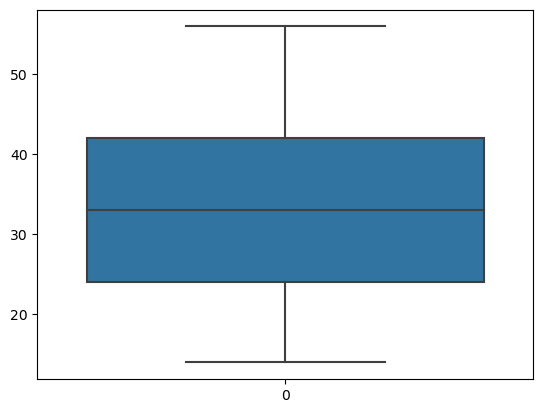

In [27]:
# plot again
sns.boxplot(train_df1['Age'])
plt.show()

Majority of customers are from age 24-42.

In [28]:
# replace the nan using mode age
#train_df1['Age'] = train_df1.groupby('Customer_ID')['Age'].apply(lambda x: x.fillna(x.mode()[0]))

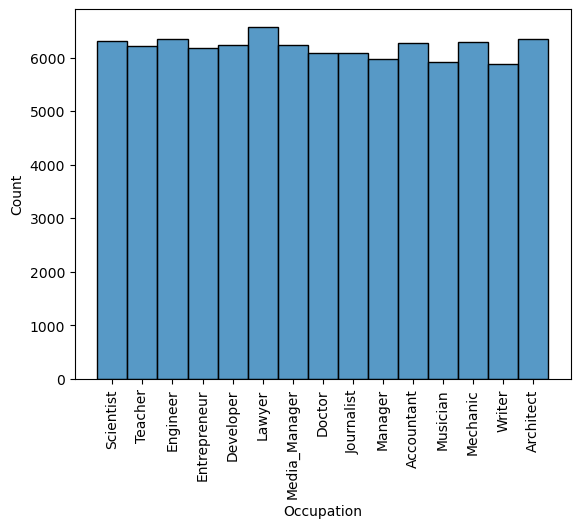

In [29]:
sns.histplot(train_df1['Occupation'])
plt.xticks(rotation=90)
plt.show()

Around 6000 values from each occupation are present.

In [30]:
# groupby customer id and find mode, replace nan with the respective modes
# train_df1['Occupation'] = train_df1.groupby('Customer_ID')['Occupation'].apply(lambda x: x.fillna(x.mode()[0]))

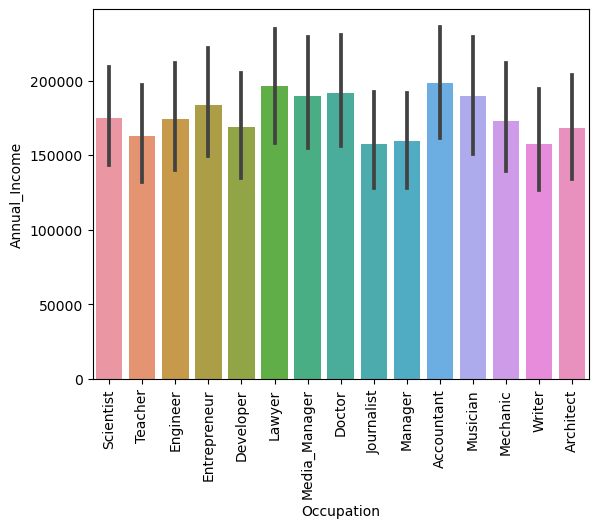

In [31]:
sns.barplot(y = train_df1['Annual_Income'], x =train_df1['Occupation'])
plt.xticks(rotation=90)
plt.show()

Accountants have the highest income.

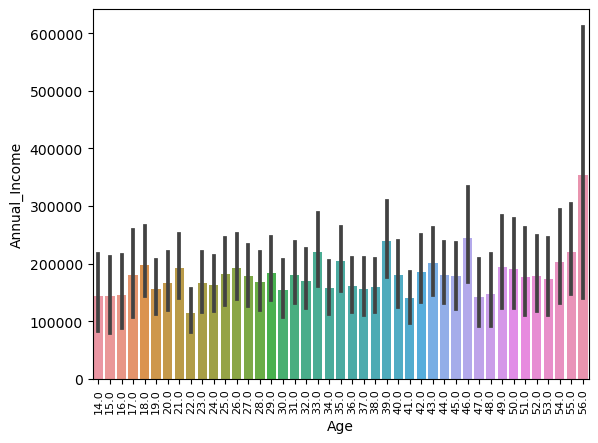

In [32]:
sns.barplot(y= train_df1['Annual_Income'], x =train_df1['Age'])
plt.xticks(rotation=90,size=8)
plt.show()

Annual Income varies with age. Annual Income is showing very high range for age 56.

In [33]:
train_df1.isna().sum()

Customer_ID                     0
Month                           0
Age                          2781
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

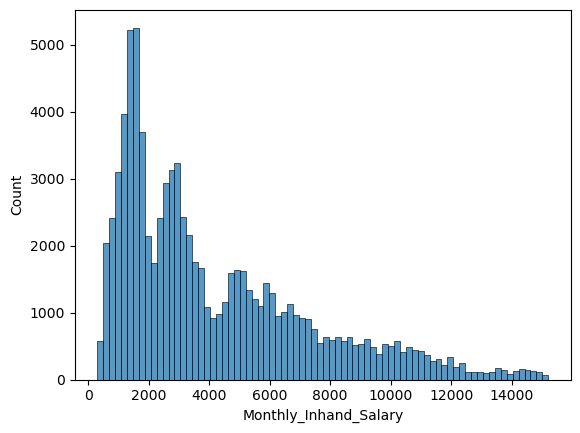

In [34]:
sns.histplot(train_df1['Monthly_Inhand_Salary'])
plt.show()

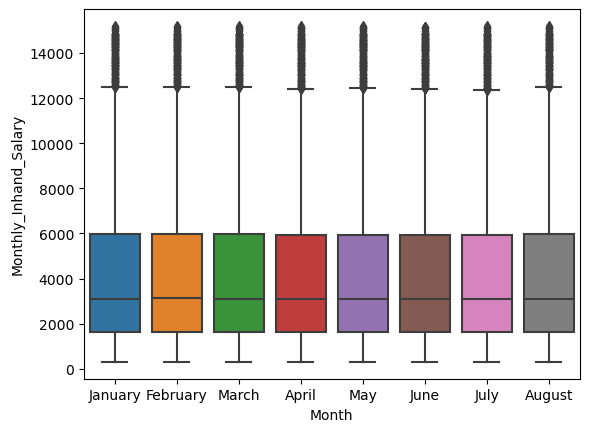

In [35]:
sns.boxplot(y = train_df1['Monthly_Inhand_Salary'], x= train_df1['Month'])
plt.show()

Can fill null values in Monthly inhand salary column with the monthwise mean, since the distribution is even.

In [36]:
train_df1['Num_Bank_Accounts'].describe() # minimum value is -1 and max is 1768

count    100000.000000
mean         17.091280
std         117.404834
min          -1.000000
25%           3.000000
50%           6.000000
75%           7.000000
max        1798.000000
Name: Num_Bank_Accounts, dtype: float64

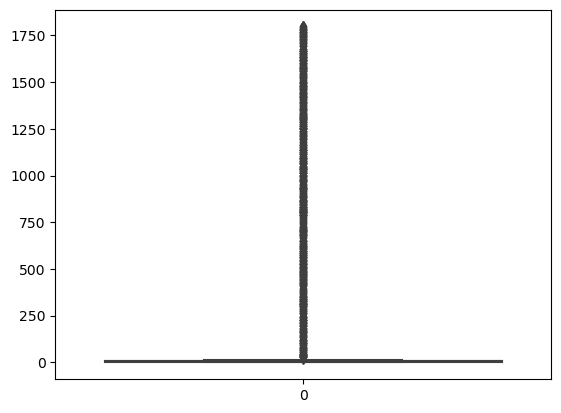

In [37]:
sns.boxplot(train_df1['Num_Bank_Accounts'])
plt.show()

In [38]:
# check the rows where num of bank accounts is above 20
train_df1[train_df1['Num_Bank_Accounts']>20].sort_values(by=['Num_Bank_Accounts'])


,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
12447,CUS_0x18bc,August,41.0,Engineer,72617.550,5996.462500,26,4,5,100,...,Good,1475.91,28.919262,NaN,No,89.405613,389.780970,Low_spent_Medium_value_payments,400.459667,Standard
95861,CUS_0x28f5,June,55.0,Developer,88073.680,7236.473333,27,7,5,4,...,Good,1482.24,31.663249,22 Years and 9 Months,No,226.698920,665.695511,Low_spent_Small_value_payments,121.252902,Good
18124,CUS_0x4b09,May,15.0,Scientist,80657.840,6534.486667,28,7,13,3,...,Standard,1017.73,39.937941,21 Years and 2 Months,Yes,167.496713,147.664229,High_spent_Large_value_payments,578.287725,Standard
69723,CUS_0x7350,April,17.0,Scientist,14173.650,1283.137500,28,5,30,4,...,Standard,2297.52,29.942065,10 Years and 2 Months,Yes,43.970815,137.581179,Low_spent_Small_value_payments,236.761756,Standard
55871,CUS_0x4ade,August,47.0,Architect,61976.440,5027.703333,28,5,8,4,...,_,78.47,28.092740,18 Years and 0 Months,No,190.556751,213.404779,High_spent_Medium_value_payments,348.808804,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35195,CUS_0x3c3a,April,37.0,Developer,8499.645,817.303750,1793,7,20,8,...,_,2573.10,34.367790,15 Years and 8 Months,NM,34.700690,33.569204,Low_spent_Large_value_payments,283.460481,Poor
29242,CUS_0x36a0,March,51.0,Media_Manager,35976.970,3126.080833,1794,3,12,3,...,Good,568.67,34.730228,31 Years and 4 Months,No,53.686329,110.355050,High_spent_Medium_value_payments,398.566704,Good
69059,CUS_0x9a7a,April,39.0,Writer,81438.560,6989.546667,1794,4,20,2,...,Standard,509.44,34.745910,7 Years and 6 Months,Yes,84.273956,195.466316,High_spent_Medium_value_payments,669.214395,Standard
64537,CUS_0x11c1,February,34.0,Engineer,29902.220,2230.851667,1798,3,12,3,...,Standard,533.71,34.380248,19 Years and 9 Months,Yes,66.210327,282.839777,Low_spent_Small_value_payments,164.035063,Standard


1314 Num_Bank_Accounts values are wrongly placed and needs to be replaced.

In [39]:
# check if same cust id has same num_bank_accounts
train_df1[train_df1['Customer_ID']=='CUS_0x18bc']

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
12440,CUS_0x18bc,January,40.0,Engineer,72617.55,5996.4625,3,4,5,100,...,Good,1475.91,30.517109,27 Years and 8 Months,No,89.405613,256.512341,Low_spent_Small_value_payments,543.728296,Poor
12441,CUS_0x18bc,February,41.0,Engineer,72617.55,5996.4625,3,4,5,2,...,Good,1475.91,38.586458,NaN,No,89.405613,377.308813,Low_spent_Medium_value_payments,412.931824,Poor
12442,CUS_0x18bc,March,41.0,Engineer,72617.55,5996.4625,3,4,5,2,...,Good,1475.91,31.905081,27 Years and 10 Months,No,89.405613,48.931673,High_spent_Large_value_payments,701.308965,Poor
12443,CUS_0x18bc,April,41.0,NaN,72617.55,5996.4625,3,677,5,2,...,Good,1475.91,36.376872,27 Years and 11 Months,No,89.405613,365.519077,Low_spent_Medium_value_payments,424.721560,Standard
12444,CUS_0x18bc,May,41.0,Engineer,72617.55,5996.4625,3,4,5,2,...,Good,1475.91,39.535362,28 Years and 0 Months,No,89.405613,168.090009,Low_spent_Large_value_payments,612.150628,Poor
12445,CUS_0x18bc,June,41.0,Engineer,72617.55,5996.4625,3,4,5,2,...,Good,1475.91,30.567781,28 Years and 1 Months,No,89.405613,308.411641,Low_spent_Small_value_payments,491.828996,Poor
12446,CUS_0x18bc,July,41.0,Engineer,72617.55,5996.4625,3,4,5,2,...,_,1475.91,33.741255,28 Years and 2 Months,No,89.405613,340.818217,Low_spent_Medium_value_payments,449.422420,Standard
12447,CUS_0x18bc,August,41.0,Engineer,72617.55,5996.4625,26,4,5,100,...,Good,1475.91,28.919262,NaN,No,89.405613,389.780970,Low_spent_Medium_value_payments,400.459667,Standard


In [40]:
# change all values above 20 to nan
train_df1.loc[train_df1['Num_Bank_Accounts']>20,'Num_Bank_Accounts'] =np.nan


In [41]:
# change all values less than 0 to nan
train_df1.loc[train_df1['Num_Bank_Accounts']<0,'Num_Bank_Accounts'] =np.nan

In [42]:
# replace the nan using mode Num Bank Accounts
# train_df1['Num_Bank_Accounts'] = train_df1.groupby('Customer_ID')['Num_Bank_Accounts'].apply(lambda x: x.fillna(x.mode()[0]))

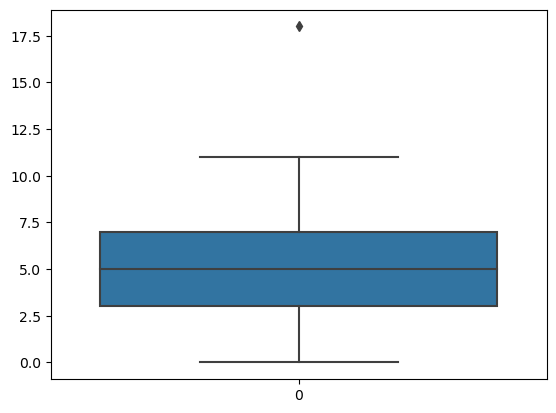

In [43]:
sns.boxplot(train_df1['Num_Bank_Accounts'])
plt.show()

In [44]:
train_df1[train_df1['Num_Bank_Accounts']==0]

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
48,CUS_0x284a,January,33.0,Lawyer,131313.40,11242.783330,0.0,1,8,2,...,Good,352.16,32.200509,30 Years and 7 Months,NM,137.644605,378.171253,High_spent_Medium_value_payments,858.462474,Good
49,CUS_0x284a,February,34.0,Lawyer,131313.40,11242.783330,0.0,1,8,2,...,Good,352.16,31.983710,30 Years and 8 Months,No,137.644605,698.873271,High_spent_Small_value_payments,547.760457,Good
50,CUS_0x284a,March,34.0,Lawyer,131313.40,10469.207760,0.0,1,8,2,...,Good,352.16,31.803134,30 Years and 9 Months,NM,911.220179,188.064321,High_spent_Large_value_payments,1038.569407,Good
51,CUS_0x284a,April,34.0,Lawyer,131313.40,10469.207760,0.0,1,8,2,...,Good,352.16,42.645785,30 Years and 10 Months,No,23834.000000,337.434956,High_spent_Medium_value_payments,899.198772,Good
52,CUS_0x284a,May,34.0,Lawyer,131313.40,10469.207760,0.0,1,8,2,...,Good,352.16,40.902517,30 Years and 11 Months,No,32662.000000,263.378909,High_spent_Large_value_payments,963.254819,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99963,CUS_0x372c,April,NaN,Lawyer,42903.79,NaN,0.0,4,6,1,...,Good,1079.48,30.625298,NaN,No,34.975457,31.193919,High_spent_Large_value_payments,520.662207,Standard
99964,CUS_0x372c,May,18.0,Lawyer,42903.79,3468.315833,0.0,4,6,1,...,Good,1079.48,23.140640,28 Years and 5 Months,No,34.975457,450.646093,Low_spent_Small_value_payments,151.210033,Good
99965,CUS_0x372c,June,19.0,Lawyer,42903.79,3468.315833,0.0,4,6,1,...,Good,1079.48,35.549456,28 Years and 6 Months,No,34.975457,187.355969,Low_spent_Large_value_payments,394.500158,Good
99966,CUS_0x372c,July,19.0,Lawyer,42903.79,3468.315833,0.0,4,6,1,...,Good,1079.48,35.123480,28 Years and 7 Months,No,34.975457,240.873798,Low_spent_Medium_value_payments,350.982329,Good


There are customers with 0 bank accounts.

In [45]:
train_df1.columns

Index(['Customer_ID', 'Month', 'Age', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

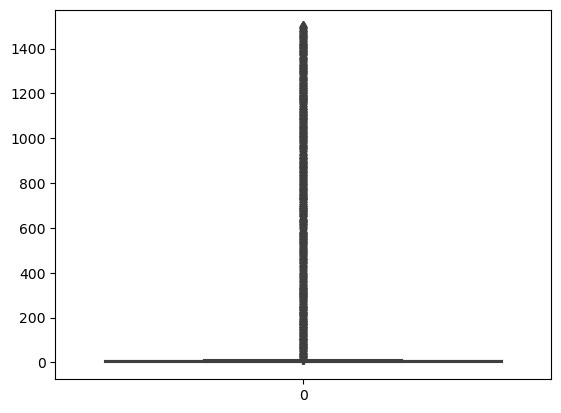

In [46]:
sns.boxplot(train_df1['Num_Credit_Card'])
plt.show()

In [47]:
# check the rows where num of credit cards is above 20
train_df1[train_df1['Num_Credit_Card']>20].sort_values(by=['Customer_ID'])['Num_Credit_Card']

44371     690
96299    1405
5802     1278
96541     106
79601    1349
         ... 
45490     774
64771    1477
75507    1440
5174      363
5172     1168
Name: Num_Credit_Card, Length: 2263, dtype: int64

In [48]:
# change all values above 20 to nan
train_df1.loc[train_df1['Num_Credit_Card']>20,'Num_Credit_Card'] =np.nan


In [49]:
# replace the nan using mode Num Credit Cards
#train_df1['Num_Credit_Card'] = train_df1.groupby('Customer_ID')['Num_Credit_Card'].apply(lambda x: x.fillna(x.mode()[0]))

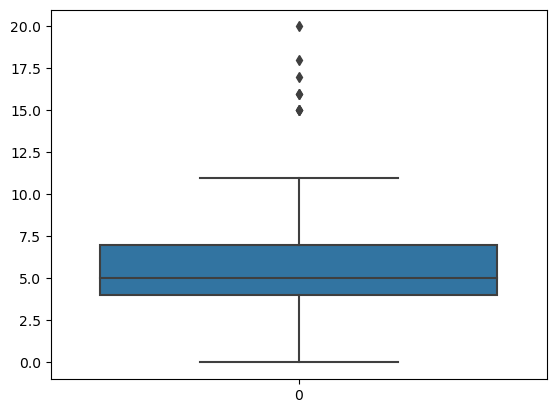

In [50]:
sns.boxplot(train_df1['Num_Credit_Card'])
plt.show()

There are customers with 0 credit cards.

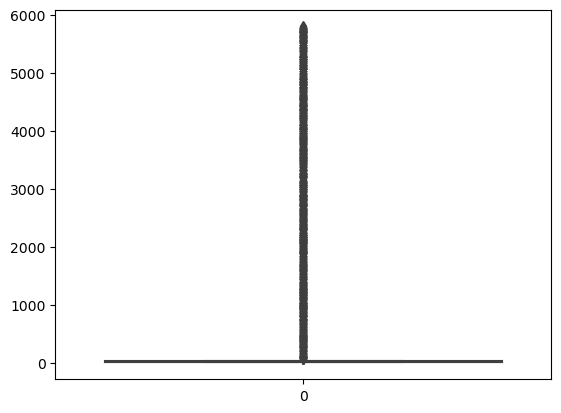

In [51]:
sns.boxplot(train_df1['Interest_Rate'])
plt.show()

In [52]:
train_df1['Interest_Rate'].value_counts(ascending=True)

5561       1
2299       1
5705       1
4389       1
1535       1
        ... 
10      4540
12      4540
6       4721
5       4979
8       5012
Name: Interest_Rate, Length: 1750, dtype: int64

In [53]:
# check the rows where interest rate is above 50
train_df1[train_df1['Interest_Rate']>50].sort_values(by=['Interest_Rate'])['Interest_Rate']

35442      59
57905      60
61480      64
18907      67
2648       73
         ... 
77710    5775
88505    5776
23512    5788
73583    5789
71641    5797
Name: Interest_Rate, Length: 2034, dtype: int64

In [54]:
# change all values of interest rate above 50 to nan
train_df1.loc[train_df1['Interest_Rate']>50,'Interest_Rate'] =np.nan

In [55]:
# replace the nan using mode Interest rate
# train_df1['Interest_Rate'] = train_df1.groupby('Customer_ID')['Interest_Rate'].apply(lambda x: x.fillna(x.mode()[0]))

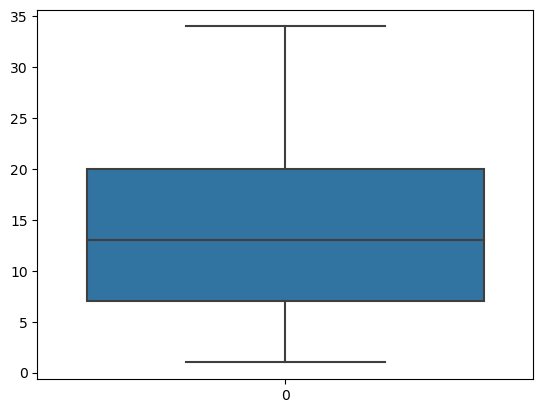

In [56]:
sns.boxplot(train_df1['Interest_Rate'])
plt.show()

The interest rates range from 1 to 34.

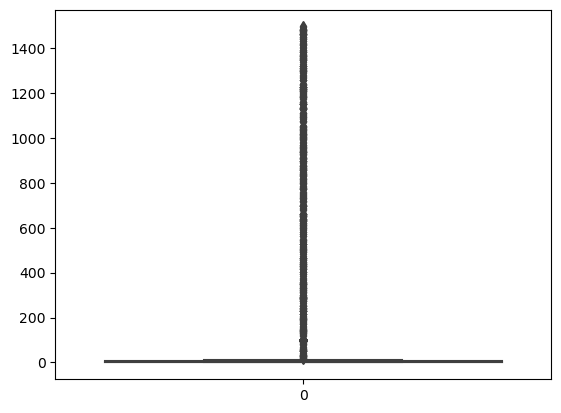

In [57]:
sns.boxplot(train_df1['Num_of_Loan'])
plt.show()

In [58]:
# check the rows where number of loan is above 25
train_df1[train_df1['Num_of_Loan']>25].sort_values(by=['Num_of_Loan'])[['Customer_ID','Num_of_Loan']]

,Customer_ID,Num_of_Loan
58351,CUS_0x45d2,27
49454,CUS_0x6a27,29
80511,CUS_0x5597,31
34780,CUS_0x3b4c,31
41454,CUS_0x9633,32
...,...,...
58597,CUS_0x3941,1482
28428,CUS_0x272a,1484
3059,CUS_0xaf23,1485
30391,CUS_0x90cf,1495


In [59]:
train_df1[train_df1['Customer_ID']=='CUS_0x45d2']

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
58344,CUS_0x45d2,January,48.0,Engineer,34053.28,2782.773333,3.0,6.0,5.0,3,...,Good,1033.06,31.980254,32 Years and 1 Months,No,72.563969,133.248993,Low_spent_Large_value_payments,342.464372,Good
58345,CUS_0x45d2,February,48.0,Engineer,34053.28,2782.773333,3.0,6.0,5.0,3,...,Good,1033.06,36.140079,32 Years and 2 Months,No,11565.000000,10000.000000,High_spent_Medium_value_payments,384.032914,Good
58346,CUS_0x45d2,March,48.0,Engineer,34053.28,2782.773333,3.0,6.0,5.0,3,...,Good,1033.06,26.000490,32 Years and 3 Months,No,72.563969,187.446810,Low_spent_Small_value_payments,308.266554,Standard
58347,CUS_0x45d2,April,48.0,Engineer,34053.28,2782.773333,3.0,6.0,5.0,3,...,Good,1033.06,30.436727,NaN,No,72.563969,74.063698,High_spent_Small_value_payments,391.649667,Good
58348,CUS_0x45d2,May,48.0,Engineer,34053.28,2782.773333,3.0,6.0,5.0,3,...,Good,1033.06,24.996474,32 Years and 5 Months,No,72.563969,10000.000000,High_spent_Medium_value_payments,388.595821,Good
58349,CUS_0x45d2,June,48.0,Engineer,34053.28,2782.773333,3.0,6.0,5.0,3,...,Good,1033.06,25.021384,32 Years and 6 Months,No,72.563969,NaN,!@9#%8,270.190825,Good
58350,CUS_0x45d2,July,48.0,Engineer,34053.28,2782.773333,3.0,6.0,5.0,3,...,Good,1033.06,35.908704,32 Years and 7 Months,No,72.563969,330.002316,Low_spent_Small_value_payments,165.711048,Good
58351,CUS_0x45d2,August,NaN,Engineer,34053.28,NaN,3.0,6.0,5.0,27,...,_,1033.06,25.337373,32 Years and 8 Months,No,72.563969,209.824220,Low_spent_Medium_value_payments,275.889144,Good


In [60]:
# change all values of number of loans is above 25 to nan
train_df1.loc[train_df1['Num_of_Loan']>25,'Num_of_Loan'] =np.nan

In [61]:
# replace the nan using mode number of loans
# train_df1['Num_of_Loan'] = train_df1.groupby('Customer_ID')['Num_of_Loan'].apply(lambda x: x.fillna(x.mode()[0]))

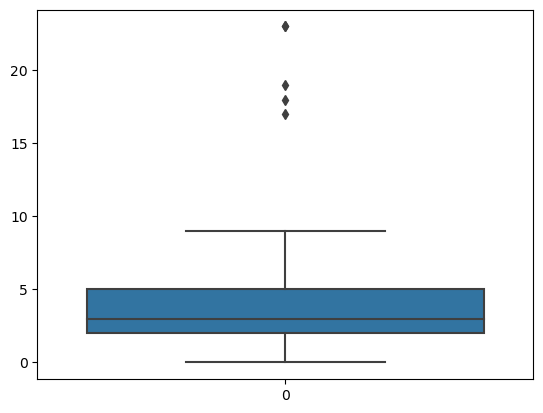

In [62]:
sns.boxplot(train_df1['Num_of_Loan'])
plt.show()

There are customers with 0 no. of loans.

In [63]:
train_df1['Type_of_Loan'].unique()

array(['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified',
       ..., 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan',
       'Payday Loan, Student Loan, Mortgage Loan, and Not Specified',
       'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan'],
      dtype=object)

In [64]:
train_df1['Delay_from_due_date'].unique()

array([ 3, -1,  5,  6,  8,  7, 13, 10,  0,  4,  9,  1, 12, 11, 30, 31, 34,
       27, 14,  2, -2, 16, 17, 15, 23, 22, 21, 18, 19, 52, 51, 48, 53, 26,
       43, 28, 25, 20, 47, 46, 49, 24, 61, 29, 50, 58, 45, 59, 55, 56, 57,
       54, 62, 65, 64, 67, 36, 41, 33, 32, 39, 44, 42, 60, 35, 38, -3, 63,
       40, 37, -5, -4, 66], dtype=int64)

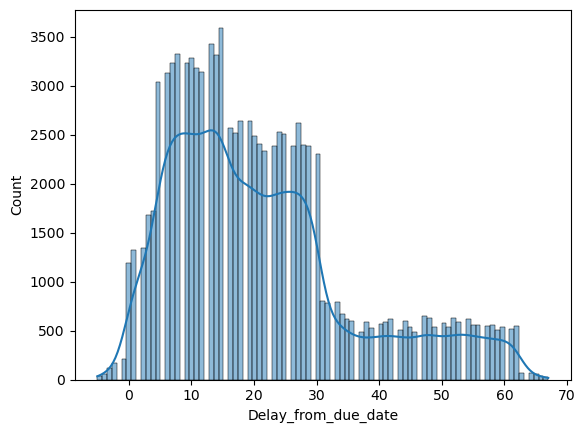

In [65]:
sns.histplot(train_df1['Delay_from_due_date'], kde=True)
plt.show()

Majority of customers did payment after due date.Only few paid before the due date (-ve values).

In [66]:
train_df1['Num_of_Delayed_Payment'].describe()

count    92998.000000
mean        30.946268
std        226.028754
min          0.000000
25%          9.000000
50%         14.000000
75%         18.000000
max       4397.000000
Name: Num_of_Delayed_Payment, dtype: float64

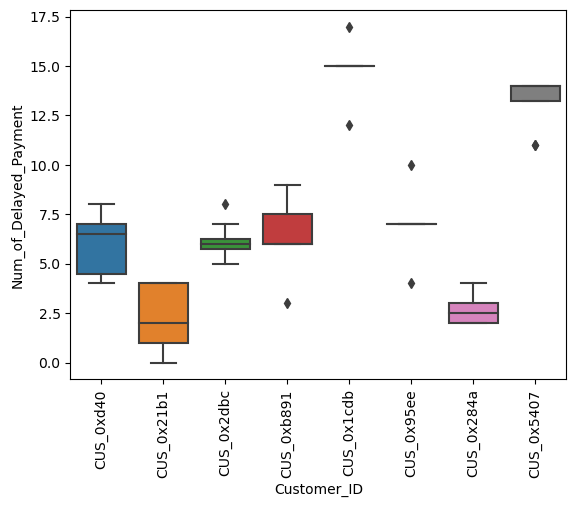

In [67]:
# find any pattern of num of delayed payments for first 8 customers
sns.boxplot(y =train_df1['Num_of_Delayed_Payment'].head(64),x= train_df1['Customer_ID'].head(64))
plt.xticks(rotation=90)
plt.show()

Number of Delayed Payments varies by customer. It accummulates if payment is not done previous month. 

In [68]:
# replace values more than 100 with nan
train_df1[train_df1['Num_of_Delayed_Payment']>100].sort_values(by=['Num_of_Delayed_Payment'])[['Customer_ID','Num_of_Delayed_Payment']]

,Customer_ID,Num_of_Delayed_Payment
55600,CUS_0xb68,102.0
83510,CUS_0x5edc,106.0
66522,CUS_0x57b1,107.0
62497,CUS_0x204a,121.0
46835,CUS_0xa9a2,130.0
...,...,...
95038,CUS_0xb6e0,4344.0
63043,CUS_0x3a06,4360.0
31796,CUS_0x8636,4384.0
82232,CUS_0xbc0c,4388.0


In [69]:
train_df1[train_df1['Customer_ID']=='CUS_0x5edc'][['Customer_ID','Month','Num_of_Delayed_Payment']]

,Customer_ID,Month,Num_of_Delayed_Payment
83504,CUS_0x5edc,January,10.0
83505,CUS_0x5edc,February,NaN
83506,CUS_0x5edc,March,10.0
83507,CUS_0x5edc,April,11.0
83508,CUS_0x5edc,May,3368.0
83509,CUS_0x5edc,June,10.0
83510,CUS_0x5edc,July,106.0
83511,CUS_0x5edc,August,12.0


In [70]:
# change all values for number of Delayed_Payment  above 100 to nan
train_df1.loc[train_df1['Num_of_Delayed_Payment']>100,'Num_of_Delayed_Payment'] =np.nan

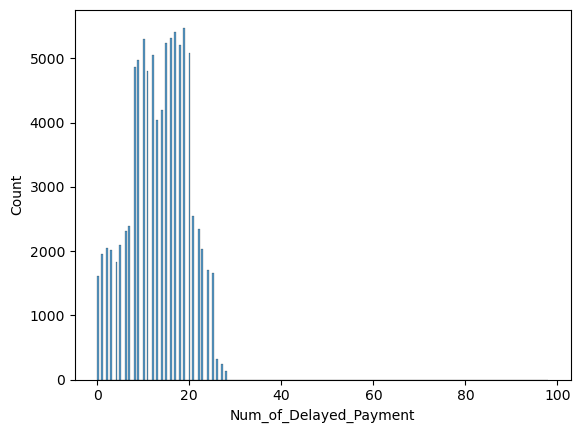

In [71]:
sns.histplot(train_df1['Num_of_Delayed_Payment'])
plt.show()

Majority of customers did not make payment on time.

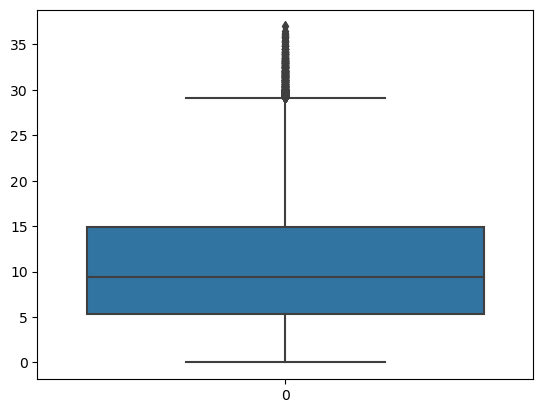

In [72]:
sns.boxplot(train_df1['Changed_Credit_Limit'])

plt.show()

In [73]:
train_df1['Num_Credit_Inquiries'].value_counts()

4.0       11271
3.0        8890
6.0        8111
7.0        8058
2.0        8028
          ...  
1721.0        1
1750.0        1
2397.0        1
621.0         1
74.0          1
Name: Num_Credit_Inquiries, Length: 1223, dtype: int64

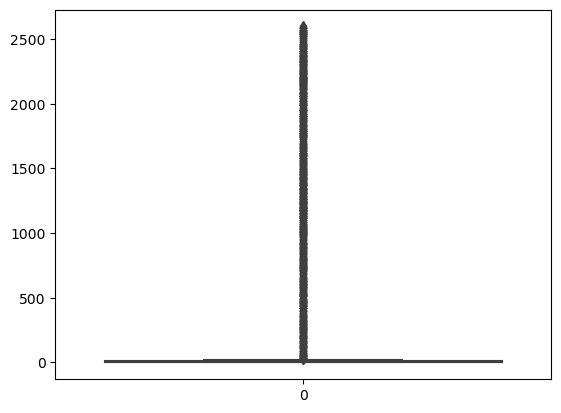

In [74]:
sns.boxplot(train_df1['Num_Credit_Inquiries'])
plt.show() #replace extreme values using mode

In [75]:
train_df1['Credit_Mix'].unique() 

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

In [76]:
train_df1['Credit_Mix'] = train_df1['Credit_Mix'].replace('_', np.nan)

In [77]:
train_df1['Credit_Mix'].unique() 

array([nan, 'Good', 'Standard', 'Bad'], dtype=object)

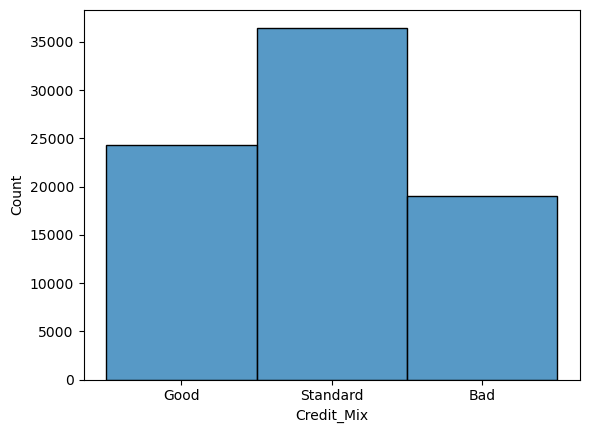

In [78]:
sns.histplot(train_df1['Credit_Mix'])
plt.show() # has to fill nan with mode

Majority of mix type is standard.

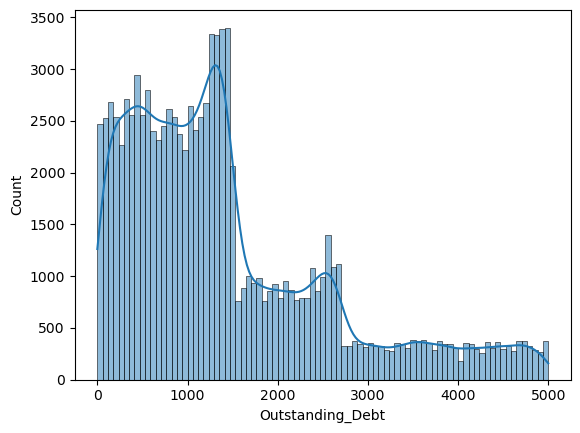

In [79]:
sns.histplot(train_df1['Outstanding_Debt'], kde=True)# debt left to be paid
plt.show()

The distribution is skewed to the right. Most people have less amount of debt left to be paid.

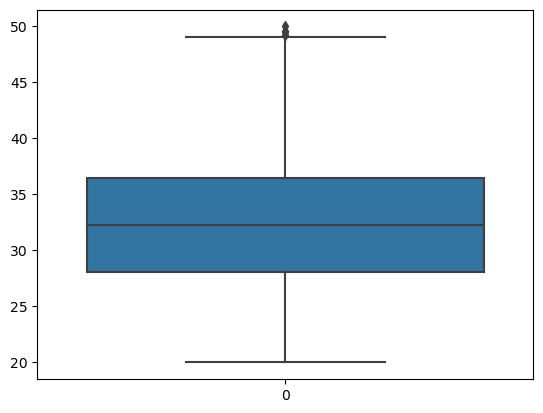

In [80]:
sns.boxplot(train_df1['Credit_Utilization_Ratio'])
plt.show() # shows how much credit is used each month 

Distribution is almost normal.

In [81]:
train_df1.isna().sum()

Customer_ID                     0
Month                           0
Age                          2781
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts            1335
Num_Credit_Card              2263
Interest_Rate                2034
Num_of_Loan                  4343
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7726
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [82]:
train_df1['Credit_History_Age'].unique() # can convert to numeric and replace nan based on neighboring values

array(['22 Years and 1 Months', nan, '22 Years and 3 Months',
       '22 Years and 4 Months', '22 Years and 5 Months',
       '22 Years and 6 Months', '22 Years and 7 Months',
       '26 Years and 7 Months', '26 Years and 8 Months',
       '26 Years and 9 Months', '26 Years and 10 Months',
       '26 Years and 11 Months', '27 Years and 0 Months',
       '27 Years and 1 Months', '27 Years and 2 Months',
       '17 Years and 9 Months', '17 Years and 10 Months',
       '17 Years and 11 Months', '18 Years and 1 Months',
       '18 Years and 2 Months', '18 Years and 3 Months',
       '18 Years and 4 Months', '17 Years and 3 Months',
       '17 Years and 4 Months', '17 Years and 5 Months',
       '17 Years and 6 Months', '17 Years and 7 Months',
       '17 Years and 8 Months', '30 Years and 8 Months',
       '30 Years and 9 Months', '30 Years and 10 Months',
       '30 Years and 11 Months', '31 Years and 0 Months',
       '31 Years and 1 Months', '31 Years and 2 Months',
       '31 Years and

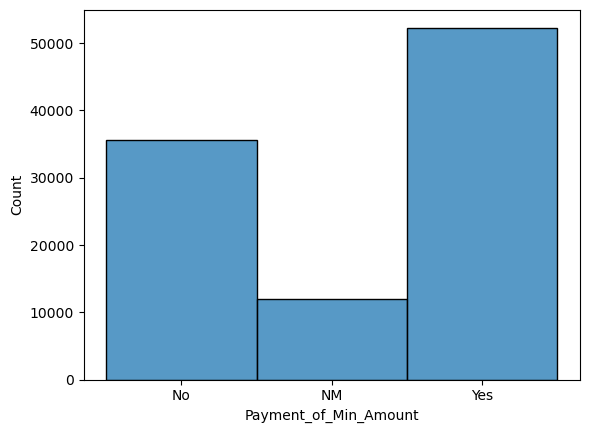

In [83]:
sns.histplot(train_df1['Payment_of_Min_Amount'])
plt.show() # check if only the minimum amount was paid 

Most of the Customers, paid only the minimum amount.

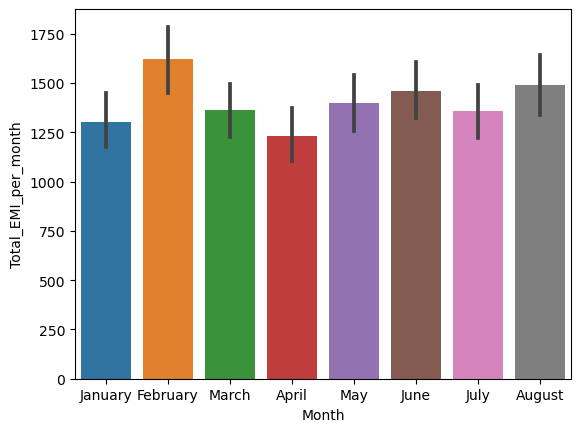

In [84]:
sns.barplot(y=train_df1['Total_EMI_per_month'],x =train_df1['Month'])
plt.show() #EMI dsitribution month wise

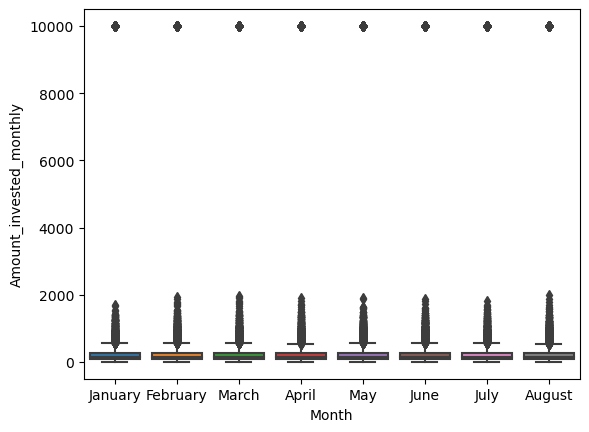

In [85]:
sns.boxplot(y=train_df1['Amount_invested_monthly'], x=train_df1['Month'])
plt.show()

There is extreme value of 10000 present in every month.

In [86]:
train_df1[train_df1['Amount_invested_monthly']==10000]


,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
18,CUS_0x2dbc,March,34.0,NaN,143162.64,NaN,1.0,5.0,8.0,3.0,...,Good,1303.01,26.519815,17 Years and 11 Months,No,246.992320,10000.0,High_spent_Small_value_payments,715.741367,Good
23,CUS_0x2dbc,August,34.0,Engineer,143162.64,12187.220000,1.0,5.0,8.0,3.0,...,Good,1303.01,38.374753,18 Years and 4 Months,No,246.992320,10000.0,High_spent_Small_value_payments,895.494583,Standard
28,CUS_0xb891,May,55.0,Entrepreneur,30689.89,2612.490833,2.0,5.0,4.0,1.0,...,Good,632.46,41.154317,17 Years and 7 Months,No,16.415452,10000.0,Low_spent_Large_value_payments,359.374915,Standard
121,CUS_0x33d2,February,30.0,Scientist,31993.78,2942.148333,6.0,6.0,7.0,2.0,...,Standard,818.22,37.958569,16 Years and 11 Months,Yes,45.141298,10000.0,Low_spent_Small_value_payments,157.869803,Standard
142,CUS_0xfdb,July,46.0,Teacher,32284.62,2898.385000,6.0,7.0,17.0,6.0,...,Standard,1283.37,24.205533,6 Years and 11 Months,Yes,103.037560,10000.0,Low_spent_Small_value_payments,85.902095,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99879,CUS_0x3855,August,27.0,Scientist,118677.54,9963.795000,4.0,4.0,6.0,4.0,...,Good,995.47,39.747228,30 Years and 6 Months,No,237.106366,10000.0,High_spent_Medium_value_payments,801.752297,Good
99882,CUS_0x47fa,March,31.0,Mechanic,16884797.00,5440.945000,7.0,3.0,NaN,0.0,...,Standard,330.60,38.524095,23 Years and 0 Months,Yes,0.000000,10000.0,High_spent_Small_value_payments,536.342920,Standard
99919,CUS_0x1619,August,54.0,Media_Manager,20059.98,1523.665000,8.0,5.0,12.0,NaN,...,Good,909.01,32.473773,16 Years and 10 Months,No,45.076827,10000.0,Low_spent_Small_value_payments,267.184985,Poor
99951,CUS_0x51b3,August,33.0,Media_Manager,59146.36,4908.863333,3.0,6.0,6.0,1.0,...,Good,418.03,27.682186,20 Years and 8 Months,No,26.778419,10000.0,Low_spent_Large_value_payments,389.488483,Standard


In [87]:
train_df1['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: Payment_Behaviour, dtype: int64

In [88]:
# replace error value with nan
train_df1['Payment_Behaviour'] = train_df1['Payment_Behaviour'].replace('!@9#%8', np.nan)

In [89]:
# replace nan using mode

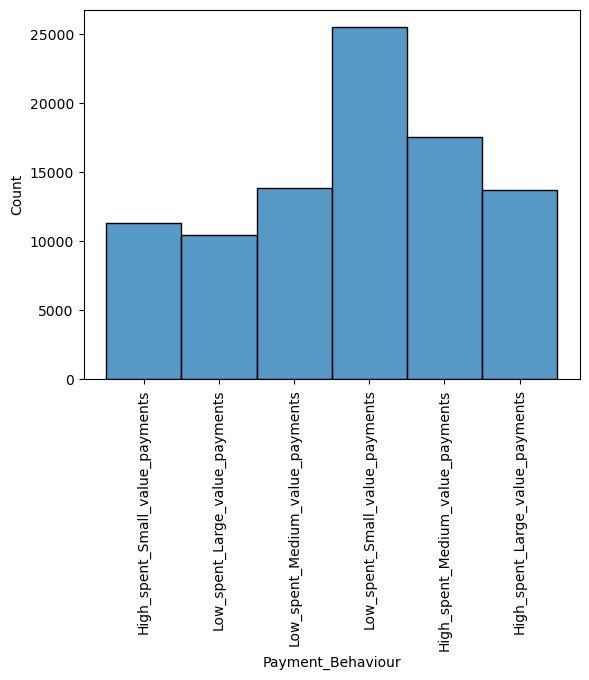

In [90]:
sns.histplot(train_df1['Payment_Behaviour'])
plt.xticks(rotation=90)
plt.show()

Large number of customers do Low_spent_Small_value_payments (25513).

In [91]:
train_df1['Monthly_Balance'].value_counts()

3.333333e+26    9
3.500149e+02    2
6.950572e+02    2
3.124941e+02    1
6.043402e+02    1
               ..
2.806862e+02    1
3.662890e+02    1
1.511883e+02    1
3.067503e+02    1
3.936737e+02    1
Name: Monthly_Balance, Length: 98790, dtype: int64

In [92]:
train_df1[train_df1['Monthly_Balance']==max(train_df1['Monthly_Balance'])]

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
5545,CUS_0x9885,February,17.0,Developer,41086.400,3660.866667,3.0,4.0,6.0,7.0,...,Standard,113.98,34.826541,11 Years and 6 Months,Yes,145.544320,201.142993,Low_spent_Medium_value_payments,3.333333e+26,Standard
26177,CUS_0x5a90,February,45.0,Engineer,29728.310,2551.359167,3.0,4.0,6.0,2.0,...,Good,917.00,38.198076,31 Years and 9 Months,No,34.496445,198.611513,Low_spent_Large_value_payments,3.333333e+26,Good
29158,CUS_0x288d,July,55.0,Lawyer,30748.930,2572.410833,1.0,6.0,12.0,2.0,...,Good,860.97,40.634250,19 Years and 5 Months,No,43.727774,79.071807,High_spent_Small_value_payments,3.333333e+26,Standard
35570,CUS_0x85e9,March,45.0,NaN,20929.295,1704.107917,5.0,3.0,9.0,3.0,...,NaN,858.09,33.943626,21 Years and 7 Months,No,13798.000000,220.304552,Low_spent_Small_value_payments,3.333333e+26,Standard
38622,CUS_0x2b77,July,21.0,Doctor,15167.620,1471.968333,4.0,5.0,3.0,1.0,...,Good,847.03,28.541848,NaN,NM,9.930809,128.875872,Low_spent_Small_value_payments,3.333333e+26,Standard
60009,CUS_0xc06e,February,30.0,Journalist,92114.680,7811.223333,3.0,4.0,8.0,1.0,...,Standard,820.52,39.089475,20 Years and 10 Months,Yes,54.219664,NaN,High_spent_Large_value_payments,3.333333e+26,Standard
75251,CUS_0x57f3,April,29.0,Mechanic,60904.590,NaN,3.0,4.0,12.0,2.0,...,Standard,2441.47,29.878716,12 Years and 11 Months,Yes,61.525140,394.893957,Low_spent_Small_value_payments,3.333333e+26,Standard
82918,CUS_0x41bf,July,44.0,Journalist,61990.520,4900.876667,10.0,10.0,25.0,9.0,...,Bad,3618.91,37.718591,13 Years and 8 Months,NM,355.143396,194.283488,Low_spent_Small_value_payments,3.333333e+26,Standard
83255,CUS_0x2f7e,August,31.0,Doctor,126353.040,10635.420000,4.0,7.0,19.0,2.0,...,NaN,859.77,28.442867,31 Years and 9 Months,No,167.043910,549.766139,Low_spent_Medium_value_payments,3.333333e+26,Poor


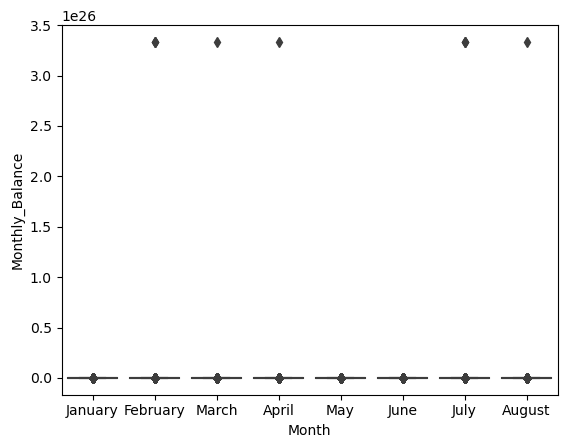

In [93]:
sns.boxplot(y=train_df1['Monthly_Balance'], x=train_df1['Month'])
plt.show()

There are 9 extreme monthly balance values (3.333333e+26 ). It needs to be replaced with nan.

In [94]:
train_df1.loc[train_df1['Monthly_Balance']==max(train_df1['Monthly_Balance']),'Monthly_Balance'] =np.nan


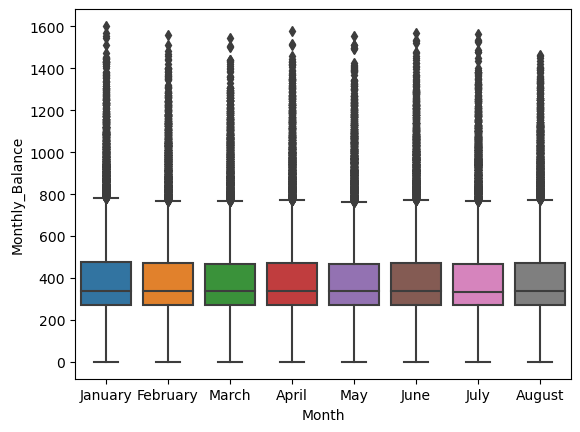

In [95]:
sns.boxplot(y=train_df1['Monthly_Balance'], x=train_df1['Month'])
plt.show()

Monthly balance is evenly distributed.

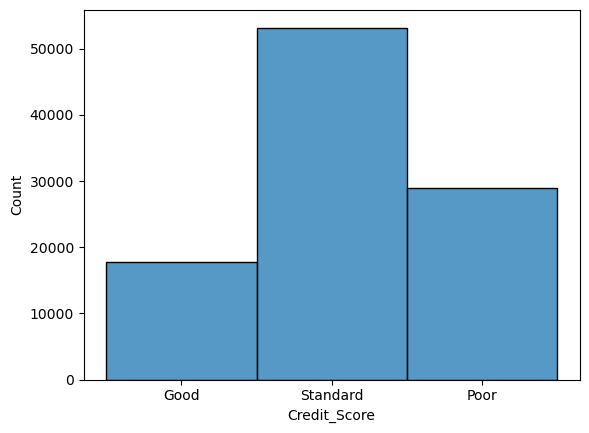

In [96]:
sns.histplot(train_df1['Credit_Score'])
plt.show()

There is uneven distribution of target column values.

In [97]:
train_df1.isna().sum()

Customer_ID                     0
Month                           0
Age                          2781
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts            1335
Num_Credit_Card              2263
Interest_Rate                2034
Num_of_Loan                  4343
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7726
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour            7600
Monthly_Balance              1209
Credit_Score                    0
dtype: int64

In [98]:
train_df1.columns

Index(['Customer_ID', 'Month', 'Age', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

#### 4. Plot w.r.t Target column

In [99]:
# only categorical columns
cat_cols = ['Month','Occupation','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour' ]

AxesSubplot(0.125,0.11;0.775x0.77)


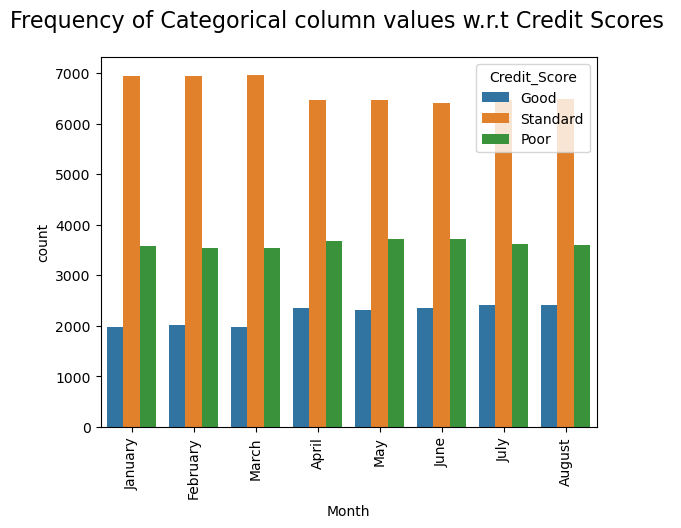

AxesSubplot(0.125,0.11;0.775x0.77)


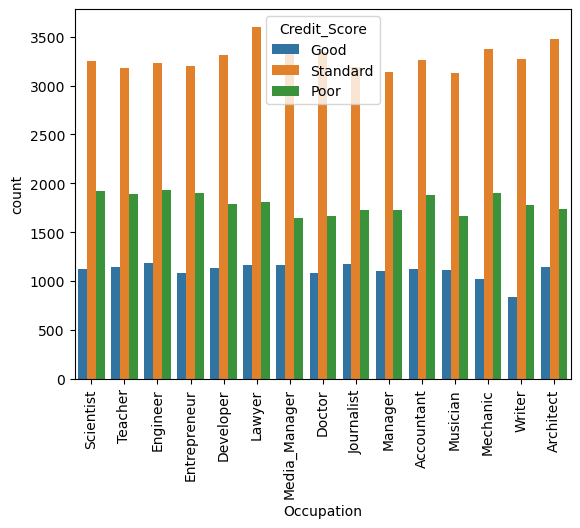

AxesSubplot(0.125,0.11;0.775x0.77)


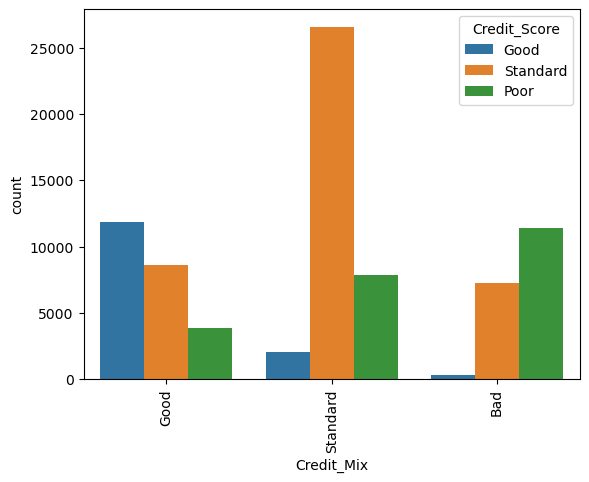

AxesSubplot(0.125,0.11;0.775x0.77)


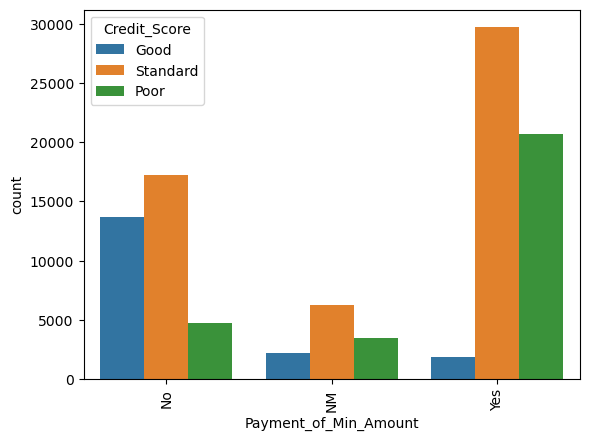

AxesSubplot(0.125,0.11;0.775x0.77)


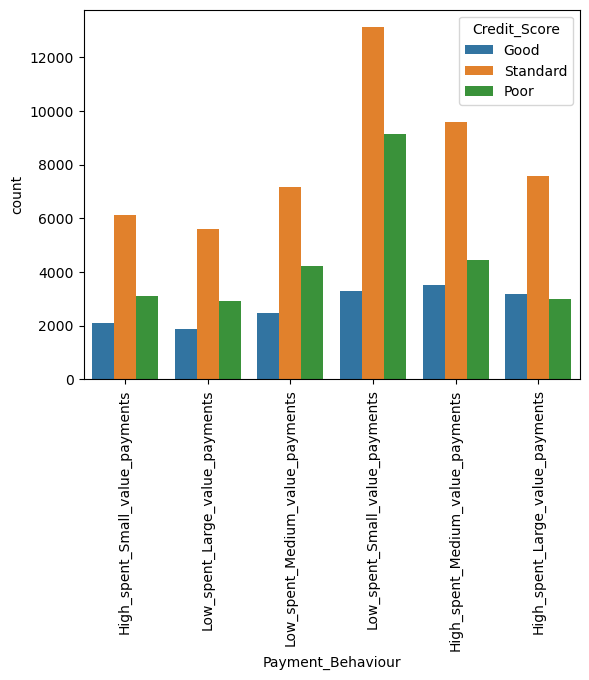

In [100]:
plt.suptitle("Frequency of Categorical column values w.r.t Credit Scores ", size=16)
for cat in cat_cols:    
    print(sns.countplot(x=train_df1[cat],hue= train_df1['Credit_Score'])) 
    plt.xticks(rotation=90)
    plt.show()

- Month Vs credit scores : In all the months, Standard Credit score values > Poor > Good.
- Occupation Vs Credit scores : In each occupation , Standard Credit score values > Poor > Good.
- Credit_mix vs credit scores : for standard creditmix, most of the values belong to standard scores...
- Payment of min amount Vs Credit scores : Customers who paid more than minimum amount, tend to have good credit scores.
- Payment behavior vs Credit scores : Customers with standard credit scores mostly make low_spend_small_value payments and same in case of poor credit scores.


In [101]:
select_cols = ['Month','Age','Occupation','Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan','Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries','Credit_Mix','Payment_of_Min_Amount','Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score']

In [102]:
# columns with discrete values
disc_cols = ['Age', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Num_of_Loan','Delay_from_due_date', 'Num_of_Delayed_Payment', 
       'Num_Credit_Inquiries']

AxesSubplot(0.125,0.11;0.775x0.77)


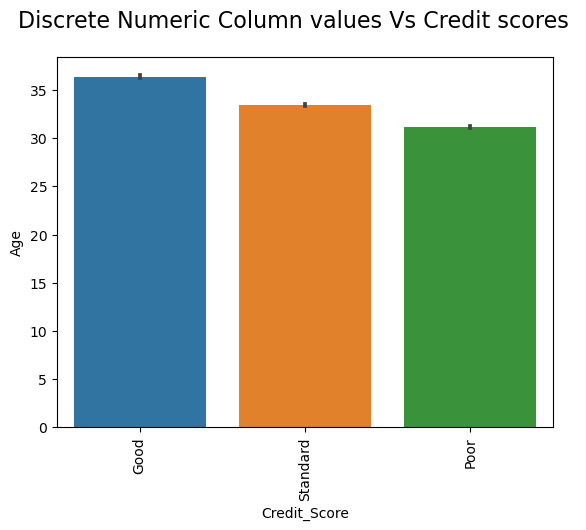

AxesSubplot(0.125,0.11;0.775x0.77)


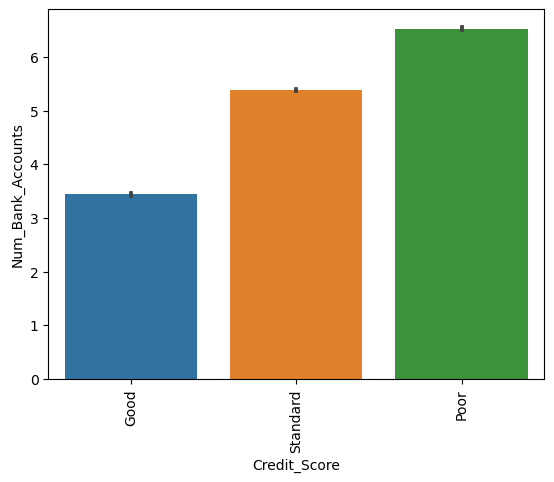

AxesSubplot(0.125,0.11;0.775x0.77)


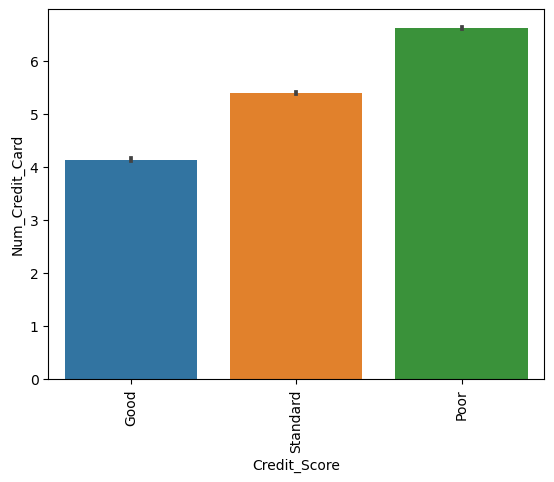

AxesSubplot(0.125,0.11;0.775x0.77)


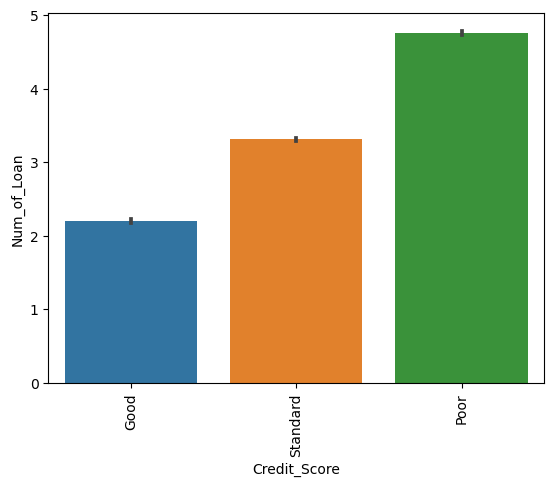

AxesSubplot(0.125,0.11;0.775x0.77)


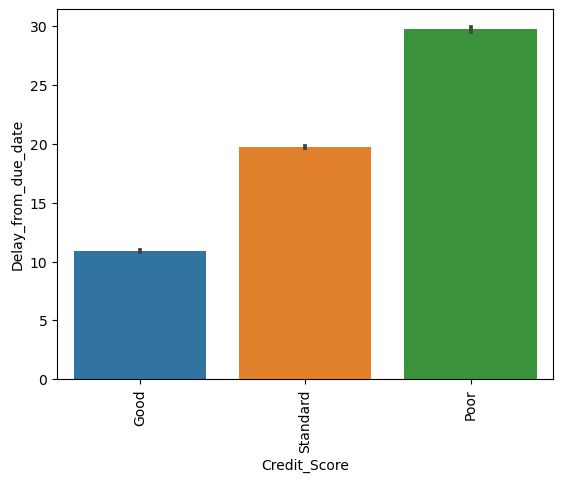

AxesSubplot(0.125,0.11;0.775x0.77)


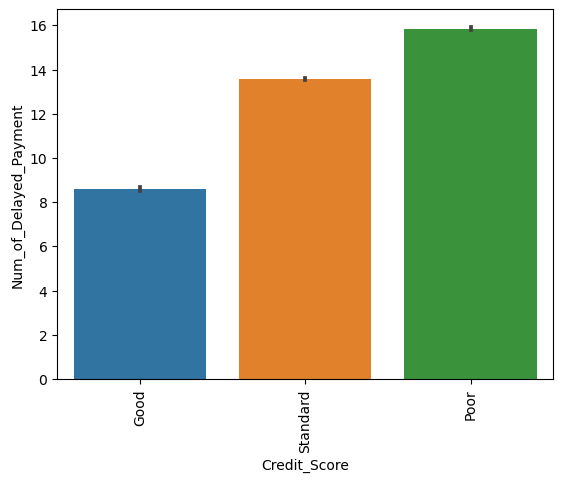

AxesSubplot(0.125,0.11;0.775x0.77)


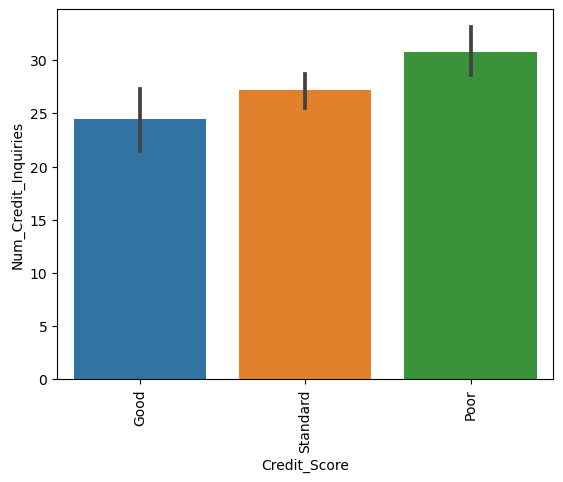

In [103]:
plt.suptitle("Discrete Numeric Column values Vs Credit scores ", size=16)
for num in disc_cols:
    print(sns.barplot(y=train_df1[num],x= train_df1['Credit_Score'])) 
    plt.xticks(rotation=90)
    plt.show()

For Num_Bank_Accounts,Num_Credit_Card, Num_of_Loan,Delay_from_due_date, Num_of_Delayed_Payment, Num_Credit_Inquiries - higher the values, poorer the credit score

In [104]:
train_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Month                     100000 non-null  object 
 2   Age                       97219 non-null   float64
 3   Occupation                92938 non-null   object 
 4   Annual_Income             100000 non-null  float64
 5   Monthly_Inhand_Salary     84998 non-null   float64
 6   Num_Bank_Accounts         98665 non-null   float64
 7   Num_Credit_Card           97737 non-null   float64
 8   Interest_Rate             97966 non-null   float64
 9   Num_of_Loan               95657 non-null   float64
 10  Type_of_Loan              88592 non-null   object 
 11  Delay_from_due_date       100000 non-null  int64  
 12  Num_of_Delayed_Payment    92274 non-null   float64
 13  Changed_Credit_Limit      97909 non-null   fl

### 5 . Bivariate Analysis

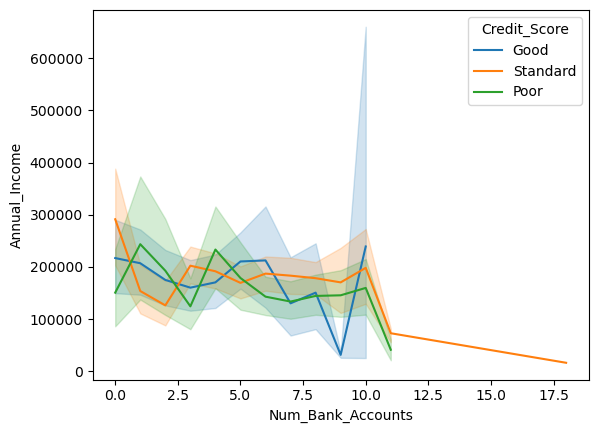

In [105]:
# Annual Income vs no. of bank accounts
sns.lineplot(x= train_df1['Num_Bank_Accounts'], y= train_df1['Annual_Income'], hue=train_df1['Credit_Score'])
plt.show()

- There is a peak in the graph, showing customers whose num of bank accounts is high and annual income is also high.Also their credit scores remain good. 
- There is a downward peak in graph, showing customers whose income is low, but no. of bank accounts if high and credit score is also good.

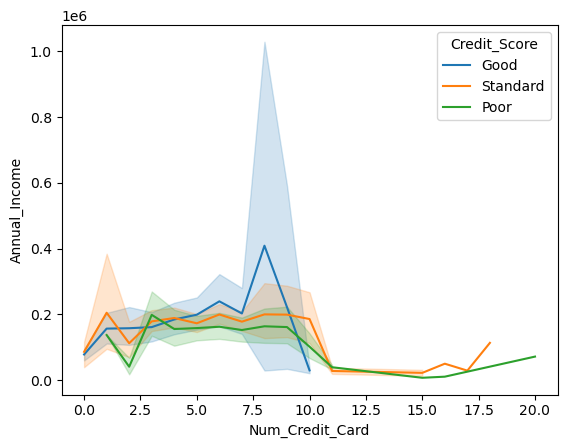

In [106]:
# Annual Income vs no. of credit cards
sns.lineplot(x= train_df1['Num_Credit_Card'], y= train_df1['Annual_Income'], hue=train_df1['Credit_Score'])
plt.show()

- Some customers with low annual income own high no. of credit cards, their credit scores are poor/standard.

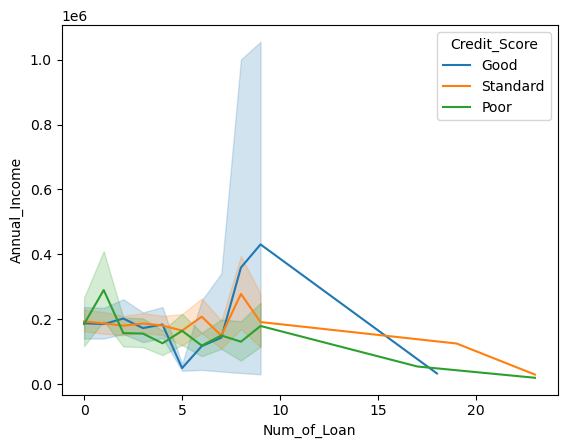

In [107]:
# Annual Income vs no. of loan
sns.lineplot(x= train_df1['Num_of_Loan'], y= train_df1['Annual_Income'], hue=train_df1['Credit_Score'])
plt.show()

- Low Annual Income customers have taken large number of loans.

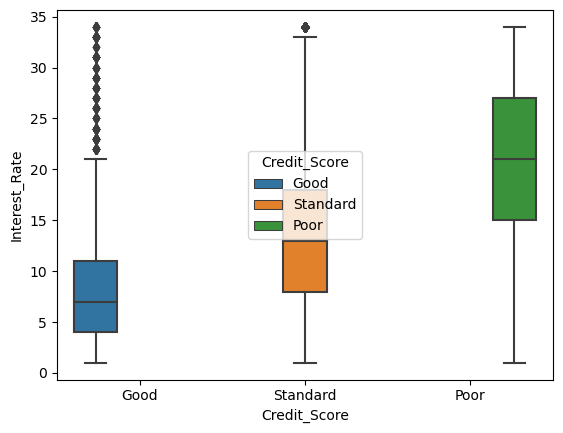

In [108]:
# Credit Score vs Interest rate
sns.boxplot(x= train_df1['Credit_Score'], y= train_df1['Interest_Rate'], hue=train_df1['Credit_Score'])
plt.show()

- Poor Credit score customers have high interest rates.

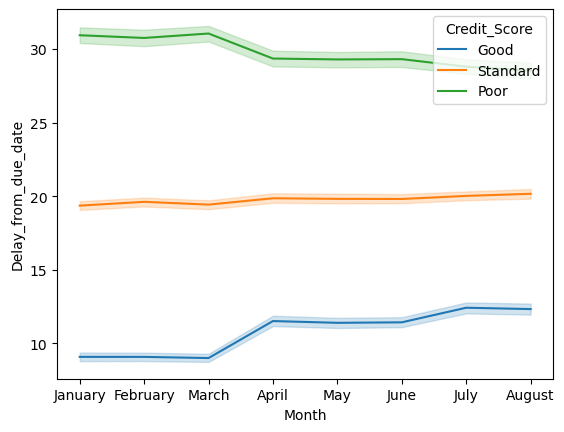

In [109]:
# Delay from due date Vs Month
sns.lineplot(x= train_df1['Month'], y= train_df1['Delay_from_due_date'], hue=train_df1['Credit_Score'])
plt.show()


- Credit scores get worse, as delay from due date increases.

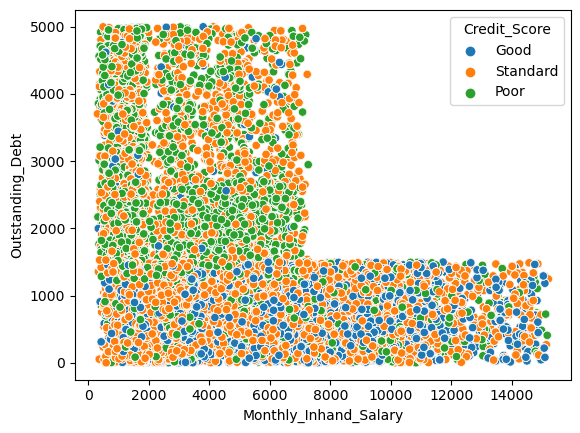

In [110]:
# Monthly Inhand salary vs Outstanding Debt
sns.scatterplot(x= train_df1['Monthly_Inhand_Salary'], y= train_df1['Outstanding_Debt'], hue=train_df1['Credit_Score'])
plt.show()

- Customers with high Monthly inhand salary , tend to have less outstanding debt and better credit scores.

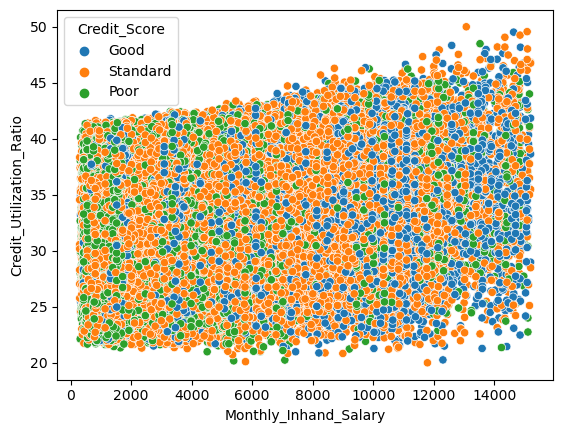

In [111]:
# Monthly Inhand salary vs Credit Utilization ratio
sns.scatterplot(x= train_df1['Monthly_Inhand_Salary'], y= train_df1['Credit_Utilization_Ratio'], hue=train_df1['Credit_Score'])
plt.show()

- Higher monthly inhand salary, higher credit utilization ratio --  mostly belongs to good credit score category.

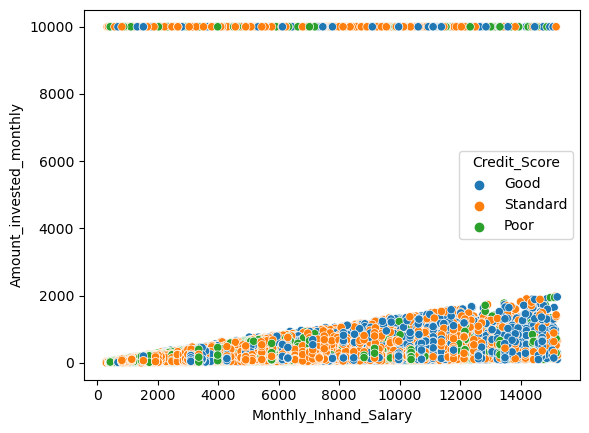

In [112]:
# Monthly Inhand salary vs Amount Invested monthly
sns.scatterplot(x= train_df1['Monthly_Inhand_Salary'], y= train_df1['Amount_invested_monthly'], hue=train_df1['Credit_Score'])
plt.show()

- More the Inhand salary, more amount is invested monthly. Also, there are some outliers in amount invested monthly column.

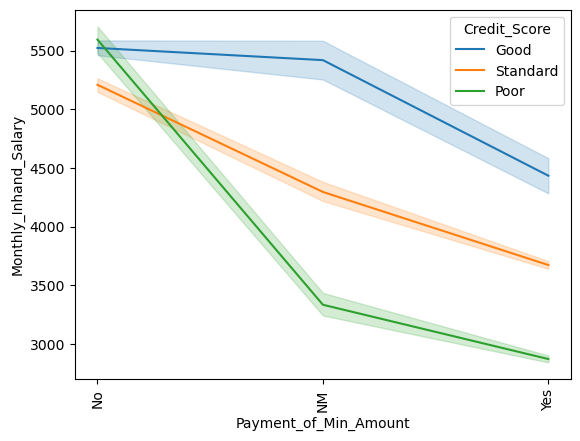

In [113]:
# Monthly Inhand Salary vs Payment_of_Min_Amount

sns.lineplot(y= train_df1['Monthly_Inhand_Salary'], x= train_df1['Payment_of_Min_Amount'], hue=train_df1['Credit_Score'])
plt.xticks(rotation=90)
plt.show()


- As the Inhand salary reduces, customers tend to do only the minimum payment.

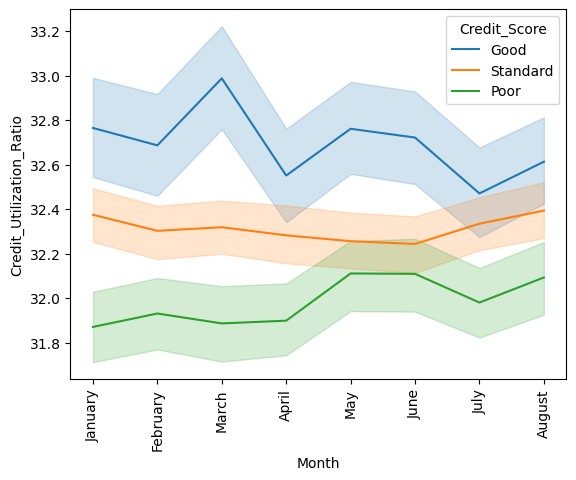

In [114]:
# Month vs Credit Utlization Ratio
sns.lineplot(y= train_df1['Credit_Utilization_Ratio'], x= train_df1['Month'], hue=train_df1['Credit_Score'])
plt.xticks(rotation=90)
plt.show()

- There is more use of credits in month of March by good credit score customers.
- Credit utlization is increasing from Jan to Aug for poor credit score customers.
- There is very less variation in credit spending over the months for standard credit score users.

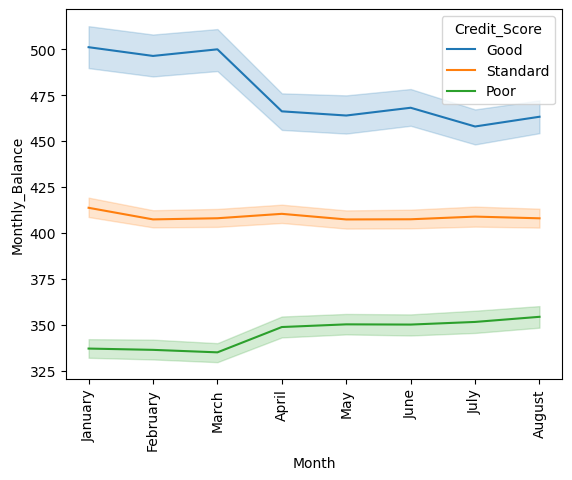

In [115]:
# Monthly Balance vs Month
sns.lineplot(y= train_df1['Monthly_Balance'], x= train_df1['Month'], hue=train_df1['Credit_Score'])
plt.xticks(rotation=90)
plt.show()

- Monthly balance is highest in February for good credit scorers.
- Monthly balance is highest in July for standard credit scorers.
- Monthly balance is highest in August for poor credit scorers.